## **importing libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Setting Column Names**

In [9]:
columns = ["symboling",
"normalized-losses",
"make",
"fuel-type",
"aspiration",
"num-of-doors",
"body-style",
"drive-wheels",
"engine-location",
"wheel-base",
"length",
"width",
"height",
"curb-weight",
"engine-type",
"num-of-cylinders",
"engine-size",
"fuel-system",
"bore",
"stroke",
"compression-ratio",
"horsepower",
"peak-rpm",
"city-mpg",
"highway-mpg",
"price"]

## **Reading Dataset**

In [10]:
df = pd.read_csv('/content/imports-85 (1).data', names=columns, header=None)

In [11]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## **Analyzing Unique values**

In [13]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

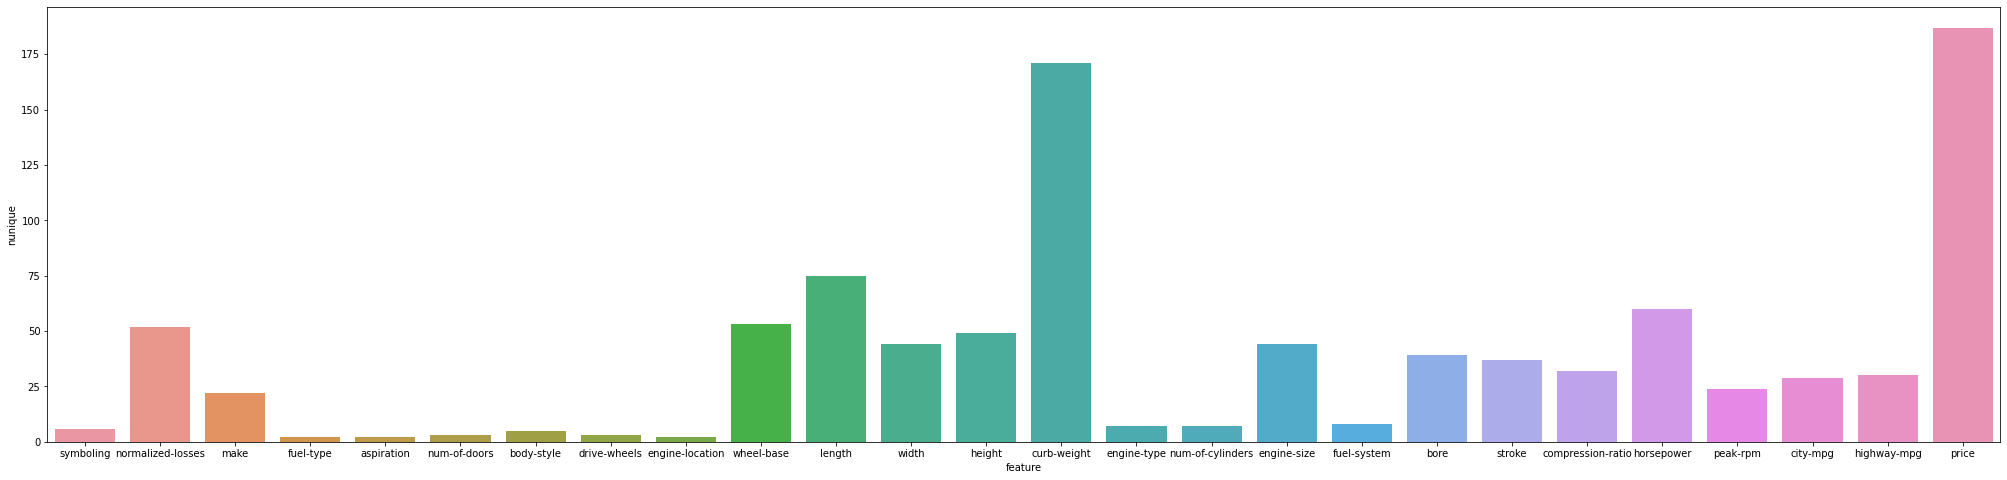

In [14]:
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(35, 8))

ax = sns.barplot(x='feature', y='nunique', data=nu)

# Data pre-processing

## **Corelation Matrix**

In [15]:
def plot_corelation_matrix(df):
  corr = df.corr()
  plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
  corrMat = plt.matshow(corr, fignum = 1)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
  plt.yticks(range(len(corr.columns)), corr.columns)
  plt.gca().xaxis.tick_bottom()
  plt.colorbar(corrMat)
  plt.title(f'Correlation Matrix', fontsize=15)
  plt.show()

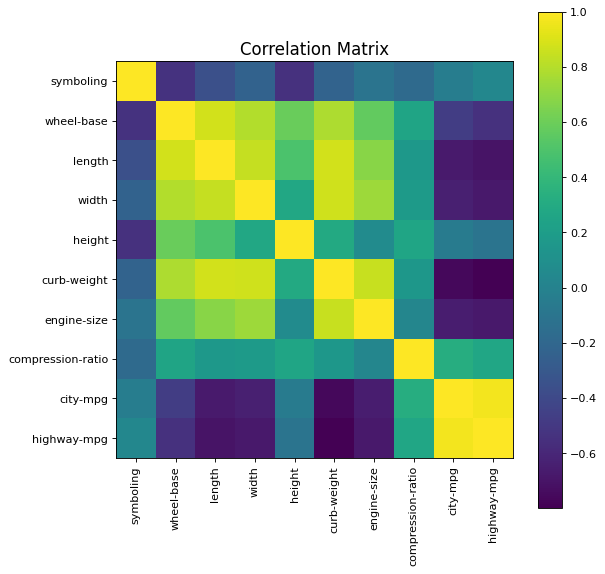

In [16]:
plot_corelation_matrix(df)

In [17]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

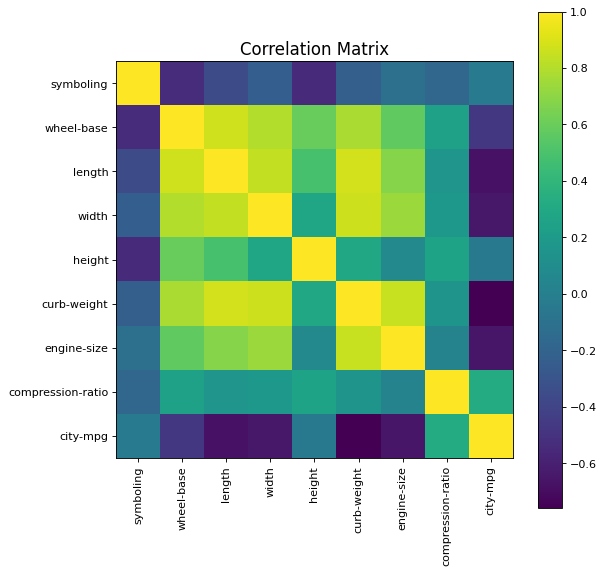

In [18]:
plot_corelation_matrix(df)

## **Handling missing values**

In [19]:
df[df.price=="?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.40,7.0,160,5500,16,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,?


In [20]:
df = df[df.price!="?"]

In [21]:
df[df.price=="?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price


In [22]:
df.price=df.price.astype("float64")
df.price=df.price.astype("int64")
df.price

<ipython-input-22-e773082bce44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price=df.price.astype("float64")
<ipython-input-22-e773082bce44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price=df.price.astype("int64")


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: int64

In [23]:
df.price.sort_values(ascending=False).head()

74     45400
16     41315
73     40960
128    37028
17     36880
Name: price, dtype: int64

<Axes: >

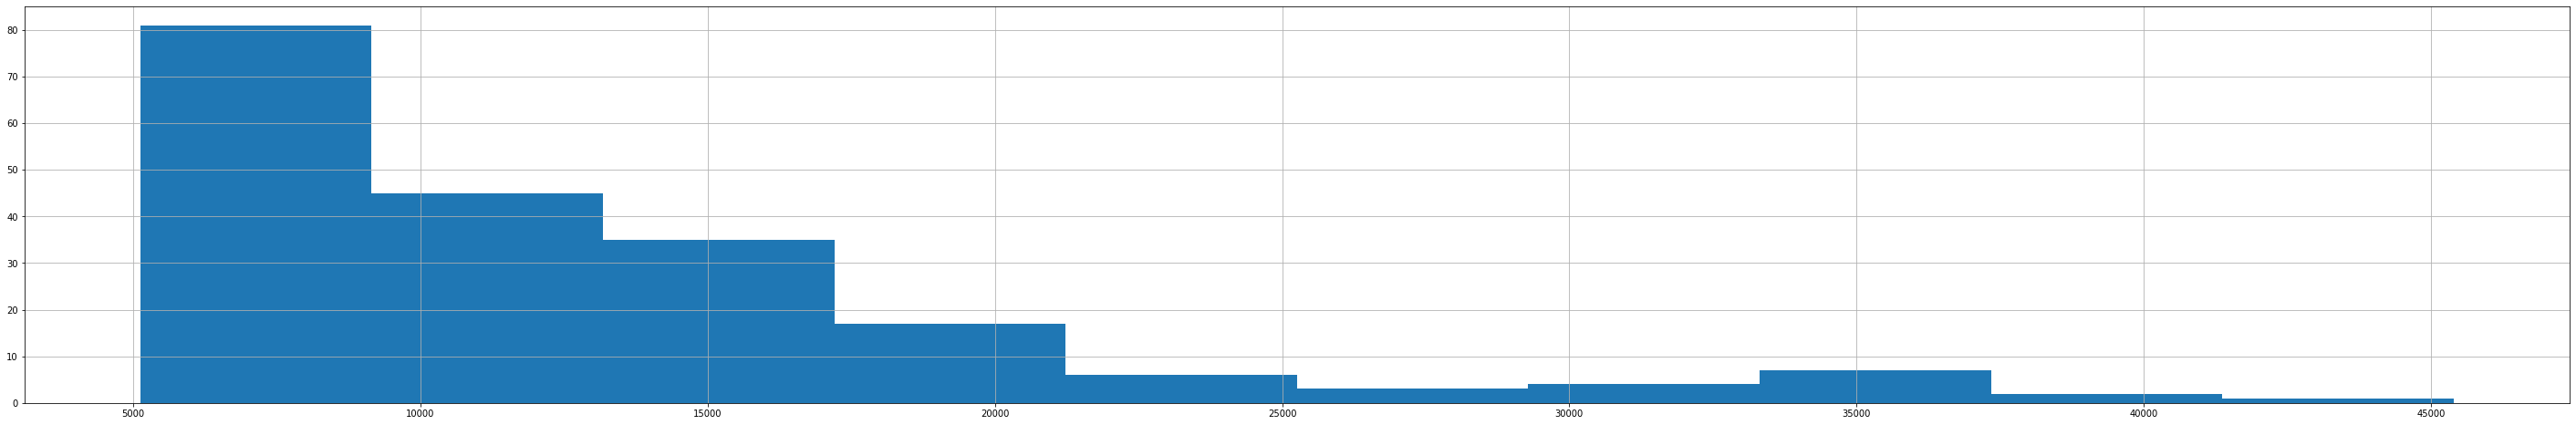

In [24]:
df.price.hist(figsize=(50,8))

In [25]:
# Distribution of Price
df.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

We want now to create a new variable to make a classification for the cars. We want to separate it in 2 classes ("<=16500" and ">16500") who is exactly the threshold for the 3rd quartile. This value is just an example to separate the cheapest cars from the most expensive. We could choos an higher threshold but in this case we don't want a too unbalanced dataset.

Class imbalance happens often in practice and may need special techniques when building a predictive model.

In [26]:
df.loc[df["price"]>16500,"target"]=">16500"
df.loc[df["price"]<=16500,"target"]="<=16500"
df["target"].value_counts()

<ipython-input-26-f0ef9a3665a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["price"]>16500,"target"]=">16500"


<=16500    151
>16500      50
Name: target, dtype: int64

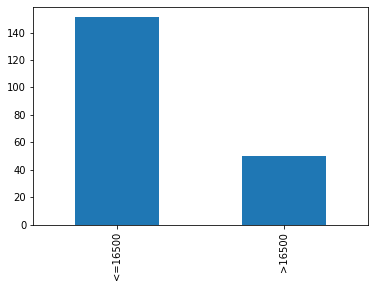

In [27]:
df["target"].value_counts().plot(kind = "bar")
plt.show()

In [28]:
#checking for any null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
price                0
target               0
dtype: int64

In [29]:
df["num-of-doors"].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [30]:
print(f"The dataset contains {df.shape[0]} samples and "
      f"{df.shape[1]} columns")
print(f"The dataset contains {df.shape[1] - 1} features.")

The dataset contains 201 samples and 26 columns
The dataset contains 25 features.


### Categorical Variables 

In [31]:
# since it's number of doors we can encode in numbers instead text
df["num-of-doors"]=df["num-of-doors"].replace("four",4)
df["num-of-doors"]=df["num-of-doors"].replace("two",2)

<ipython-input-31-68cc7c50d40f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num-of-doors"]=df["num-of-doors"].replace("four",4)
<ipython-input-31-68cc7c50d40f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num-of-doors"]=df["num-of-doors"].replace("two",2)




```
`# This is formatted as code`
```

### Filling missing value with meadian

In [32]:
col_to_convert=["normalized-losses","num-of-doors","bore","stroke","horsepower","peak-rpm"]
for i in col_to_convert:
    df[i]=df[i].replace("?",np.nan)
    df.fillna(df.median(),inplace=True)
    df[i]=pd.to_numeric(df[i],downcast="float")
    df[i]=df[i].astype("float64")

<ipython-input-32-9acbb870ce8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].replace("?",np.nan)
<ipython-input-32-9acbb870ce8a>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)
<ipython-input-32-9acbb870ce8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(),inplace=T

In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price,target
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,13495,<=16500
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,16500,<=16500
2,1,115.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,16500,<=16500
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,13950,<=16500
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,17450,>16500


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    float64
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [35]:
#Splitting numeric and object columns
df.select_dtypes(include=object).columns,df.select_dtypes(include=np.number).columns

(Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
        'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
        'target'],
       dtype='object'),
 Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
        'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'price'],
       dtype='object'))

In [36]:
categorical_columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
        'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']    
numerical_columns = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
        'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'price']

## Outlier Analysis

<Axes: >

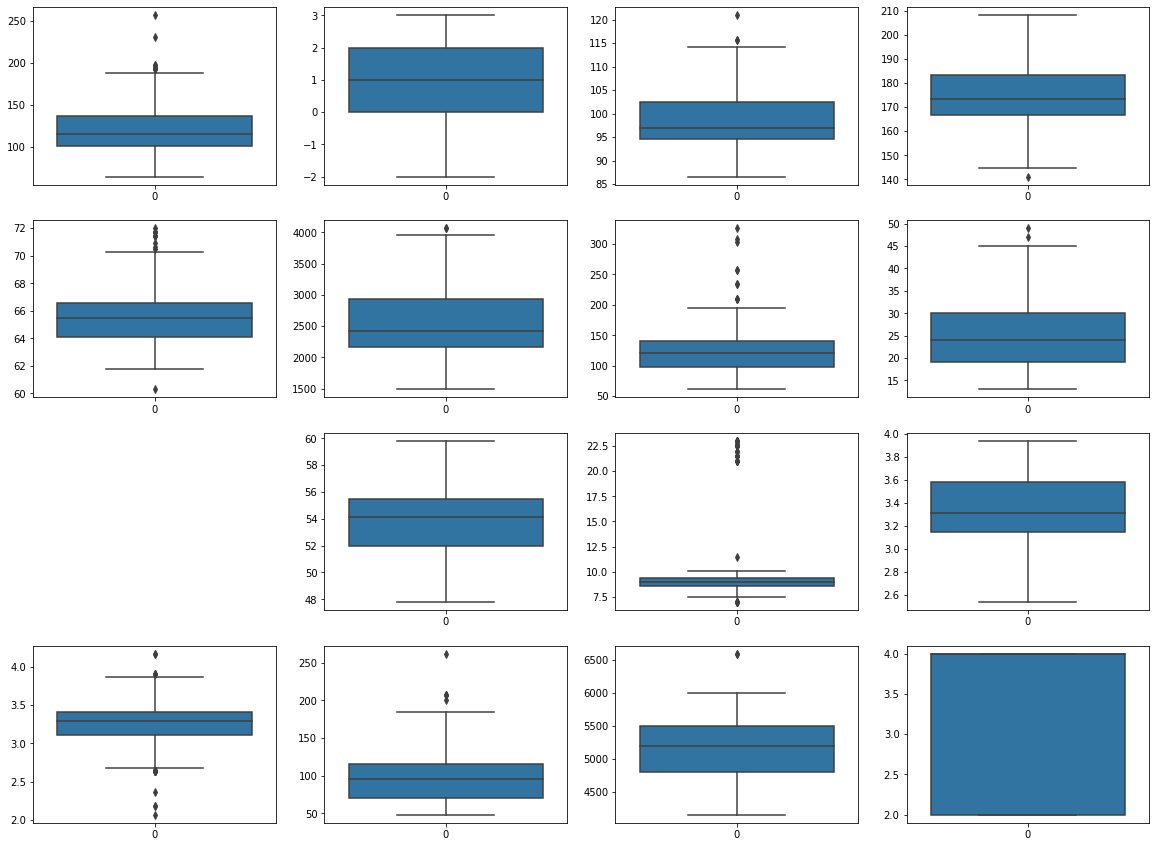

In [37]:
plt.figure(figsize= (20,15))

plt.subplot(4,4,1)
sns.boxplot(df['normalized-losses'])

plt.subplot(4,4,2)
sns.boxplot(df['symboling'])

plt.subplot(4,4,3)
sns.boxplot(df['wheel-base'])

plt.subplot(4,4,4)
sns.boxplot(df['length'])

plt.subplot(4,4,5)
sns.boxplot(df['width'])

plt.subplot(4,4,6)
sns.boxplot(df['curb-weight'])

plt.subplot(4,4,7)
sns.boxplot(df['engine-size'])

plt.subplot(4,4,8)
sns.boxplot(df['city-mpg'])

plt.subplot(4,4,10)
sns.boxplot(df['height'])

plt.subplot(4,4,11)
sns.boxplot(df['compression-ratio'])

plt.subplot(4,4,12)
sns.boxplot(df['bore'])

plt.subplot(4,4,13)
sns.boxplot(df['stroke'])

plt.subplot(4,4,14)
sns.boxplot(df['horsepower'])

plt.subplot(4,4,15)
sns.boxplot(df['peak-rpm'])

plt.subplot(4,4,16)
sns.boxplot(df['num-of-doors'])

We have outliers in every quantitatibe variables except for `symboling, bore, curb-weight and height`. We just excluded the `num-of-doors` variable because we have just 2 options (2 or 4)

Handling outlier

In [38]:
df1=df.copy()
#Substitution for the variable normalized-lossses.
df1['normalized-losses']=df1['normalized-losses'].clip(lower=df1['normalized-losses'].quantile(0.05), upper=df1['normalized-losses'].quantile(0.95))

<Axes: >

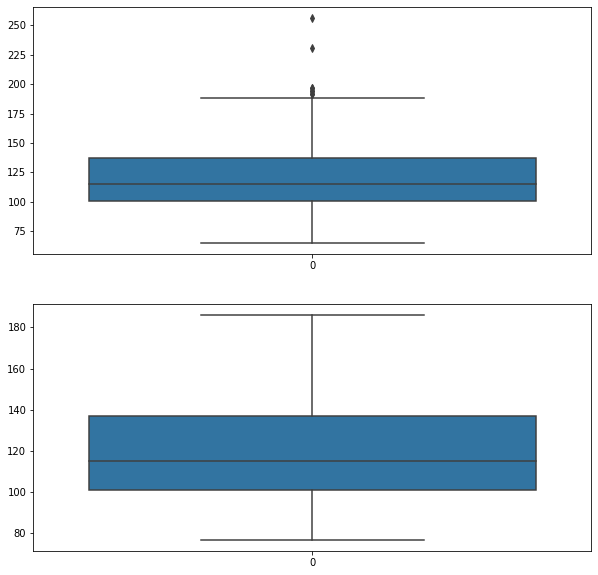

In [39]:
#We can compare the difference in the distributions before and after the removing of outliers
plt.figure(figsize= (10,10))

#Now we don't have anymore outliers for normalized losses
plt.subplot(2,1,1)
sns.boxplot(df['normalized-losses'])

plt.subplot(2,1,2)
sns.boxplot(df1['normalized-losses'])

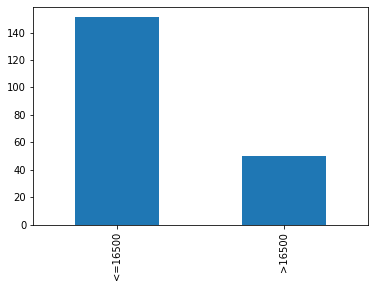

In [40]:
df["target"].value_counts().plot(kind = "bar")
plt.show()

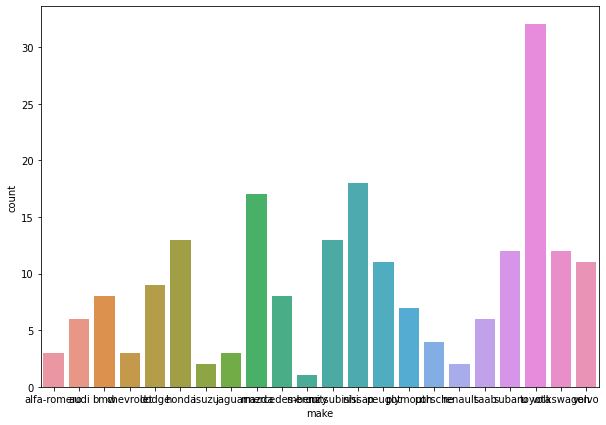

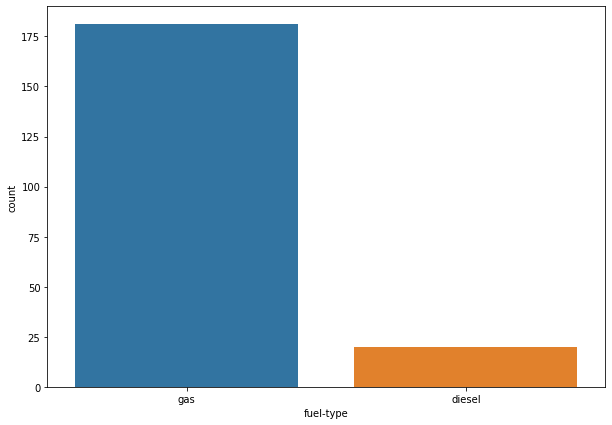

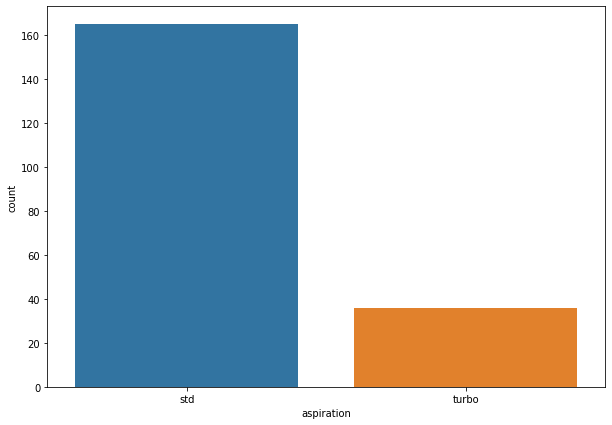

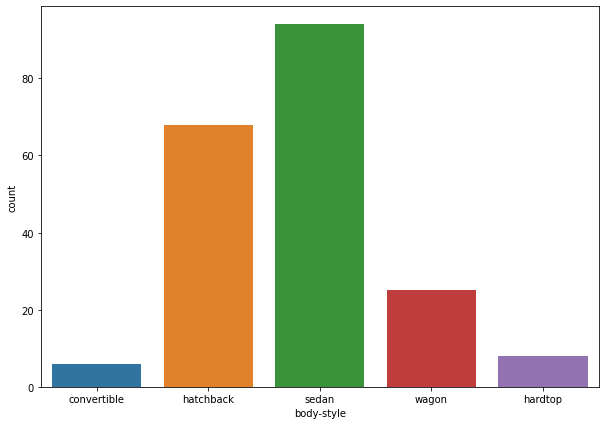

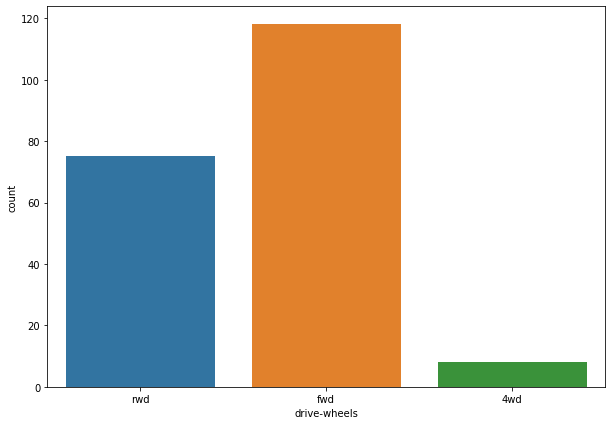

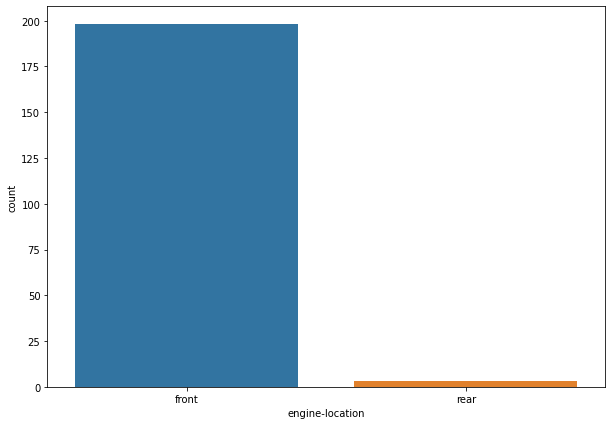

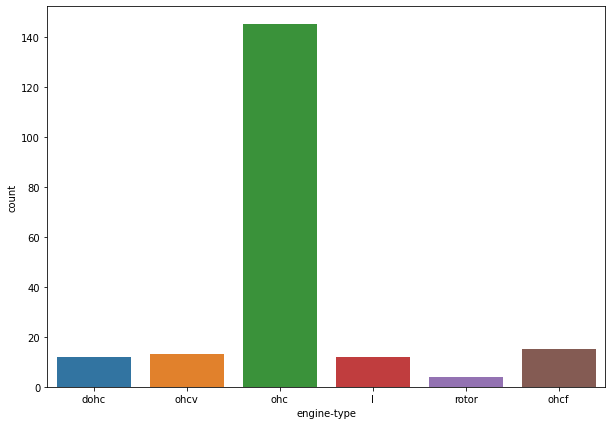

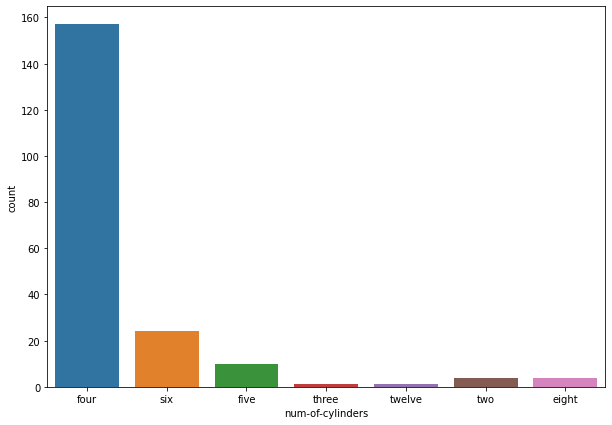

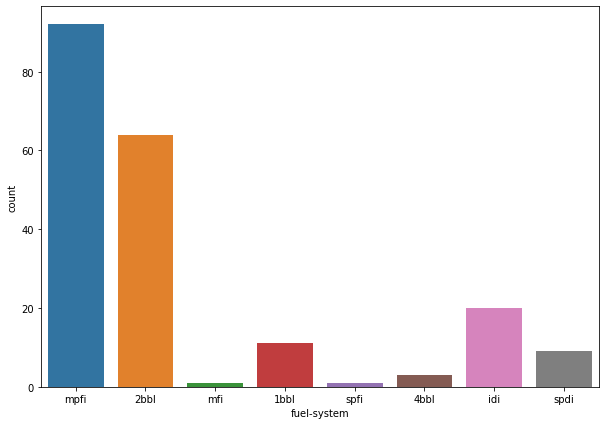

In [41]:
#Let's see how categorical features has been distributed
for i in categorical_columns:      
    plt.figure(figsize=(10,7))
    sns.countplot(x=df[i])
    plt.show()

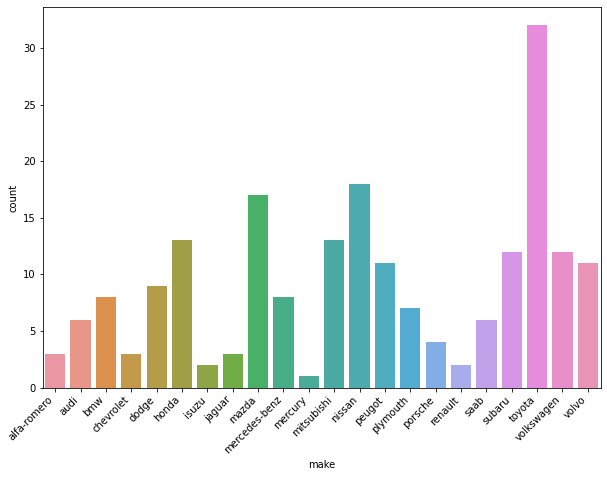

In [42]:
#improvin 1st graph details by rotating labels
plt.figure(figsize=(10,7))
ax=sns.countplot(x=df["make"])
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Numerical Clolumns

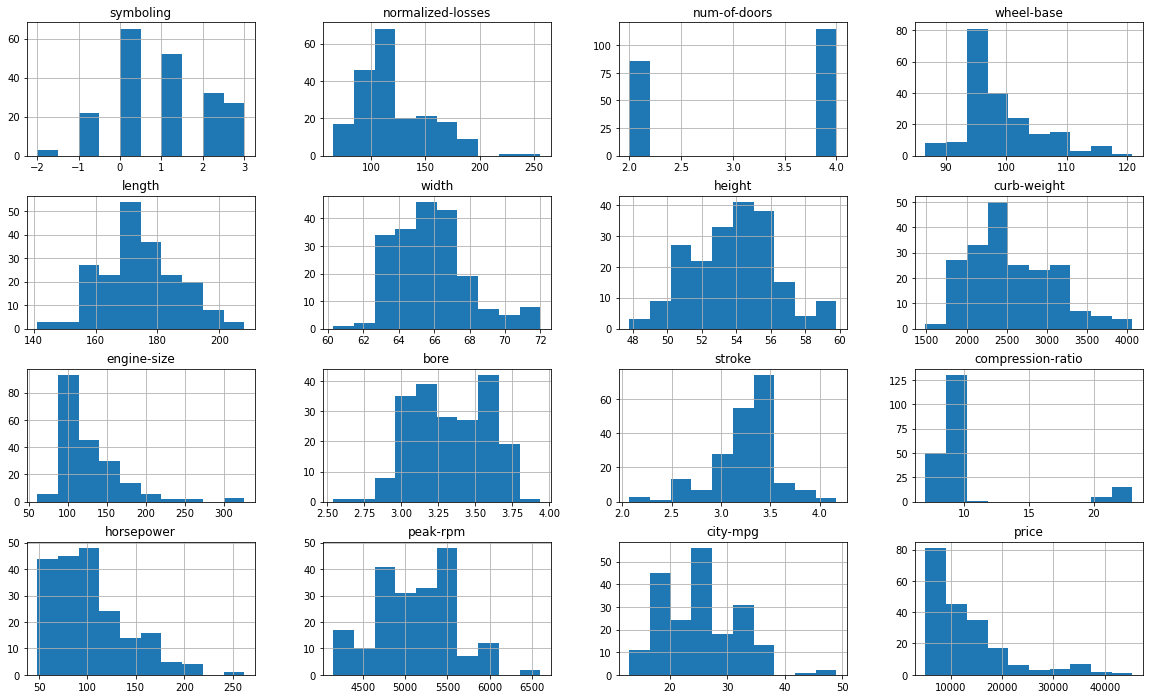

In [43]:
_ =df.hist(figsize=(20,12))

<Figure size 720x504 with 0 Axes>

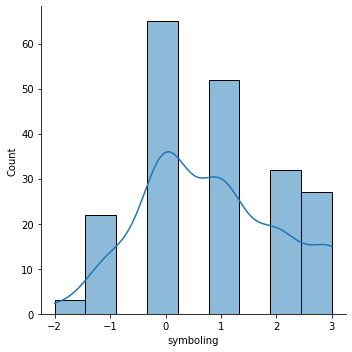

<Figure size 720x504 with 0 Axes>

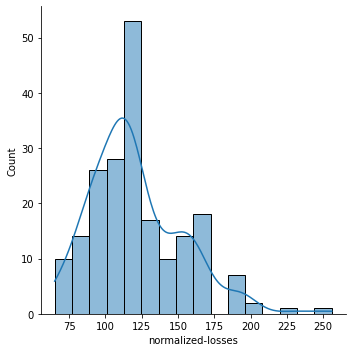

<Figure size 720x504 with 0 Axes>

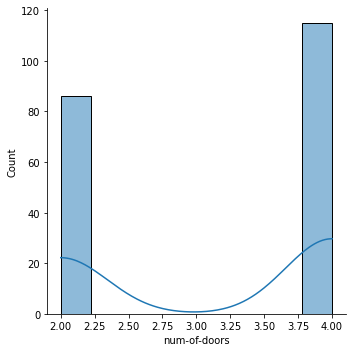

<Figure size 720x504 with 0 Axes>

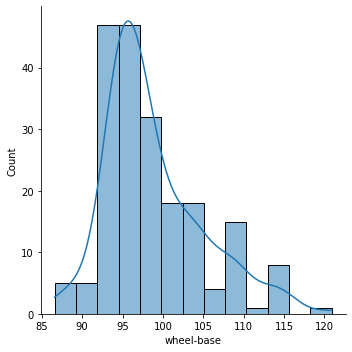

<Figure size 720x504 with 0 Axes>

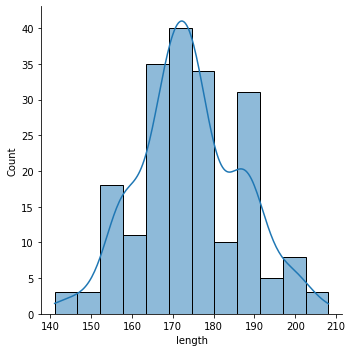

<Figure size 720x504 with 0 Axes>

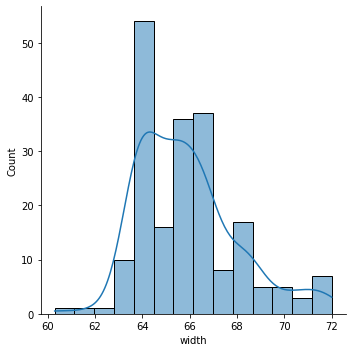

<Figure size 720x504 with 0 Axes>

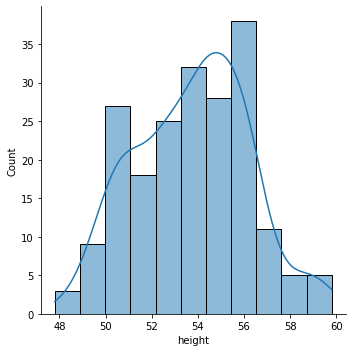

<Figure size 720x504 with 0 Axes>

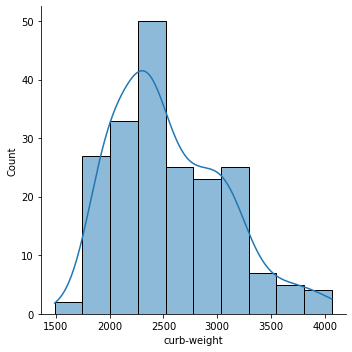

<Figure size 720x504 with 0 Axes>

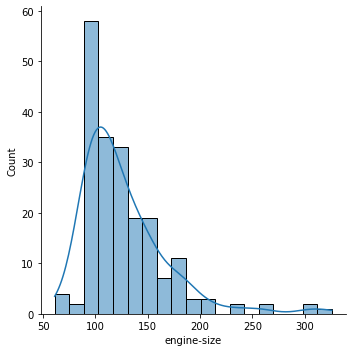

<Figure size 720x504 with 0 Axes>

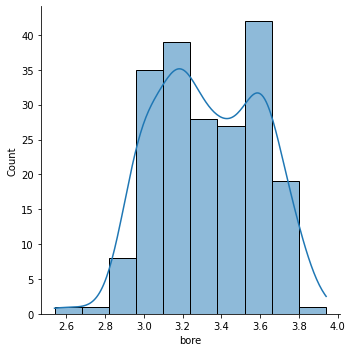

<Figure size 720x504 with 0 Axes>

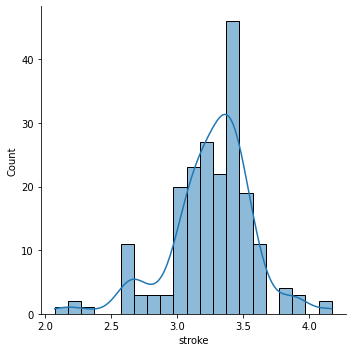

<Figure size 720x504 with 0 Axes>

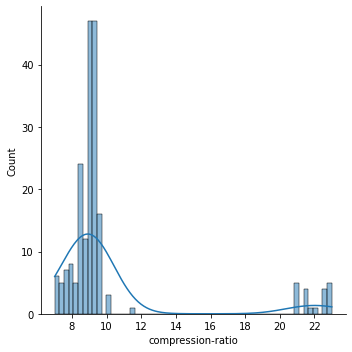

<Figure size 720x504 with 0 Axes>

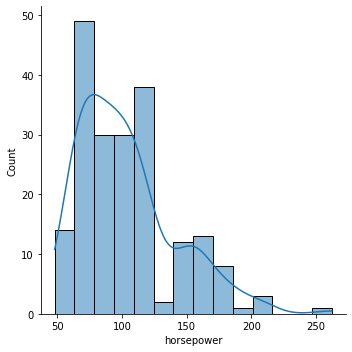

<Figure size 720x504 with 0 Axes>

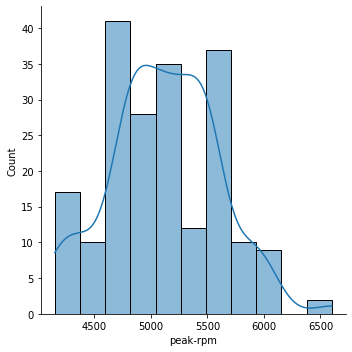

<Figure size 720x504 with 0 Axes>

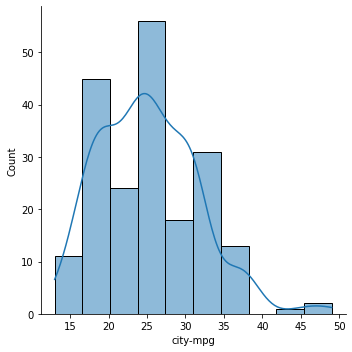

<Figure size 720x504 with 0 Axes>

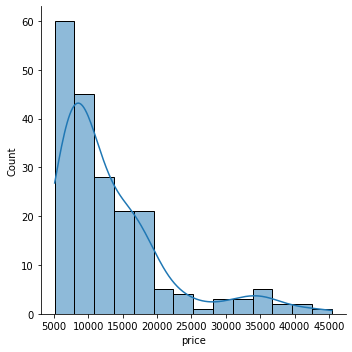

In [44]:
# Let's see which variable is bell shaped distribution
for i in numerical_columns:
    plt.figure(figsize=(10,7))
    sns.displot(df[i],kde=True)
    plt.show()

##Training the model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score,classification_report
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [46]:
X = df.drop(["target","price"], axis= 1)
y = df["price"].values.reshape(-1,1)

In [47]:
for i in categorical_columns:
    print(i)
    print(df[i].nunique())

make
22
fuel-type
2
aspiration
2
body-style
5
drive-wheels
3
engine-location
2
engine-type
6
num-of-cylinders
7
fuel-system
8


In [48]:
# features=[ 'fuel-type', 'aspiration','wheel-base', 'length', 'width', 'curb-weight','engine-size', 'bore','horsepower', 'city-mpg']
# x_train= pd.get_dummies(x_train[features])
# x_test = pd.get_dummies(x_test[features])

In [49]:
numerical_columns = ['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg']

In [50]:
categorical_columns

['make',
 'fuel-type',
 'aspiration',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [51]:
# X[numerical_columns] = scale(X[numerical_columns])

In [52]:
coulmn_transform = []

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

for idx,column_name in enumerate(categorical_columns):
  coulmn_transform.append(('category'+str(idx), OneHotEncoder(handle_unknown='ignore'), [column_name]))

for idx,column_name in enumerate(numerical_columns):
  coulmn_transform.append(("num"+str(idx), numeric_transformer, [column_name]))

In [53]:
coulmn_transform

[('category0', OneHotEncoder(handle_unknown='ignore'), ['make']),
 ('category1', OneHotEncoder(handle_unknown='ignore'), ['fuel-type']),
 ('category2', OneHotEncoder(handle_unknown='ignore'), ['aspiration']),
 ('category3', OneHotEncoder(handle_unknown='ignore'), ['body-style']),
 ('category4', OneHotEncoder(handle_unknown='ignore'), ['drive-wheels']),
 ('category5', OneHotEncoder(handle_unknown='ignore'), ['engine-location']),
 ('category6', OneHotEncoder(handle_unknown='ignore'), ['engine-type']),
 ('category7', OneHotEncoder(handle_unknown='ignore'), ['num-of-cylinders']),
 ('category8', OneHotEncoder(handle_unknown='ignore'), ['fuel-system']),
 ('num0', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler())]), ['symboling']),
 ('num1', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler())]), ['normalized-losses']),
 ('num2', Pipeline(steps=[('imputer', SimpleImputer(strate

In [54]:
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", x_train.shape)
print("Shape of test_X: ", x_test.shape)

Shape of train_X:  (140, 24)
Shape of test_X:  (61, 24)


In [55]:
x_train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg
100,0,106.0,nissan,gas,std,4.0,sedan,fwd,front,97.2,...,ohc,four,120,2bbl,3.33,3.47,8.5,97.0,5200.0,27
32,1,101.0,honda,gas,std,2.0,hatchback,fwd,front,93.7,...,ohc,four,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38
13,0,188.0,bmw,gas,std,4.0,sedan,rwd,front,101.2,...,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21
36,0,78.0,honda,gas,std,4.0,wagon,fwd,front,96.5,...,ohc,four,92,1bbl,2.92,3.41,9.2,76.0,6000.0,30
122,1,154.0,plymouth,gas,std,4.0,sedan,fwd,front,93.7,...,ohc,four,98,2bbl,2.97,3.23,9.4,68.0,5500.0,31


In [56]:
y_train

array([[ 9549],
       [ 5399],
       [21105],
       [ 7295],
       [ 7609],
       [ 6785],
       [12940],
       [ 7349],
       [ 7603],
       [ 7395],
       [ 9895],
       [ 9538],
       [10345],
       [ 6692],
       [17950],
       [ 8558],
       [ 9960],
       [13499],
       [17075],
       [16500],
       [ 9959],
       [36000],
       [18420],
       [15985],
       [ 9279],
       [ 9298],
       [ 7895],
       [13415],
       [11245],
       [ 7957],
       [11259],
       [17199],
       [ 7129],
       [20970],
       [18950],
       [ 8058],
       [17710],
       [ 8921],
       [ 8921],
       [17450],
       [ 6529],
       [ 7463],
       [11694],
       [16900],
       [ 8013],
       [16925],
       [18280],
       [16630],
       [ 5348],
       [11199],
       [13495],
       [ 7995],
       [ 7198],
       [40960],
       [32528],
       [25552],
       [32250],
       [ 8449],
       [12964],
       [12945],
       [15580],
       [ 7788],
       [

In [57]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions, pos_label='positive',
                                           average='micro')))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions, pos_label='positive',
                                           average='micro')))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions, pos_label='positive',
                                           average='micro')))

In [58]:
preprocessor = ColumnTransformer(transformers=coulmn_transform, remainder="passthrough")

In [59]:
metrics_info = []

## Random forest

In [60]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())],)
model = pipe.fit(x_train.astype(str), y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [61]:
y_pred = pipe.predict(x_train)

In [62]:
predictions = pipe.predict(x_test)
probs = model.predict_proba(x_test)

In [63]:
# print accuracy
acc= accuracy_score(y_train, y_pred)*100
print("Accuracy: ", acc) 

# print(classification_report(y_test, y_pred))


Accuracy:  97.14285714285714


In [64]:
pipe.score(x_train, y_train)

0.9714285714285714

In [65]:
metrics_info.append({"Random Forest":pipe.score(x_train, y_train)})

## Linear regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LinearRegression())
        ],)
model = pipe.fit(x_train.astype(str), y_train)

In [68]:
pipe.score(x_train, y_train)

0.9712853187085375

In [69]:
metrics_info.append({"Linear regression":pipe.score(x_train, y_train)})

In [70]:
pipe.score(x_test, y_test)

-1.1405102039215781e+22

In [71]:
y_pred = pipe.predict(x_test)

## Lasso regression

In [72]:
set_config(display='diagram')

In [73]:
from sklearn.linear_model import Lasso, LassoCV

In [74]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LassoCV(alphas = None, cv = 10, max_iter = 10000))
        ],)
model = pipe.fit(x_train.astype(str), y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
pipe.score(x_train, y_train)

0.9351864061488784

In [76]:
pipe.score(x_test, y_test)

0.8997044137929473

In [77]:
metrics_info.append({"Lasso regression":pipe.score(x_train, y_train)})

In [78]:
y_pred = pipe.predict(x_test)

In [79]:
y_pred

array([ 6938.2026186 , 28990.06604459,  6217.88229162,  7012.16755864,
       13127.79662881,  6291.32898108, 34920.15403788,  8817.27615533,
       20752.77358395, 28891.59440825, 25221.82125743, 10144.44144539,
       12717.21694359,  9879.43891673, 16666.27137425,  9345.24484785,
       10403.03987698,  6914.26475269, 10294.89874475, 35365.5452386 ,
       27322.60612389, 31264.42100254,  5526.27473755,  6791.37036431,
       25114.9517535 , 11947.76683764, 11262.5324224 , 27088.10892915,
       28720.29492371, 14604.47212254, 15929.85345855,  6470.93663138,
       13586.81247427,  7035.87178566,  6145.56507243, 14218.04747444,
        6973.26448491,  9172.64659655, 13278.30833098,  8007.68202984,
       14454.87428027, 20724.39601506,  9738.05296903,  7176.69463048,
       17882.32182293, 17642.83832253,  4309.47200546,  7070.07252331,
        9571.55451264,  6470.27439167, 17405.15712104, 20683.88302643,
       16340.60557075, 10166.72269415,  6551.87947738,  6887.75708699,
      

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
        ],)


In [82]:
model = pipe.fit(x_train.astype(str), y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [83]:
y_pred = pipe.predict(x_test)

In [84]:
pipe.score(x_train, y_train)

0.17857142857142858

In [85]:
pipe.score(x_test, y_test)

0.01639344262295082

In [86]:
metrics_info.append({"KNN":pipe.score(x_train, y_train)})

# All models metrics

In [87]:
metrics_info

[{'Random Forest': 0.9714285714285714},
 {'Linear regression': 0.9712853187085375},
 {'Lasso regression': 0.9351864061488784},
 {'KNN': 0.17857142857142858}]

In [88]:
result = {}
for d in metrics_info:
  result.update(d)

In [89]:
pd.DataFrame.from_dict([result]).T

,0
Random Forest,0.971429
Linear regression,0.971285
Lasso regression,0.935186
KNN,0.178571


#Finally we go with Lasso regression

In [90]:
#Finally we go with Lasso regression bcz Random forest and linear regression is overfitted

In [91]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LassoCV(alphas = None, cv = 10, max_iter = 10000))
        ],)
model = pipe.fit(x_train.astype(str), y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
pipe.score(x_train, y_train)

0.9351864061488784

In [93]:
pipe.score(x_test, y_test)

0.8997044137929473

In [94]:
import joblib


In [95]:
joblib.dump(pipe, 'automobile_model.bz2', compress= 9)

['automobile_model.bz2']

In [96]:
model = joblib.load('automobile_model.bz2')

In [107]:
type(model)

sklearn.pipeline.Pipeline

In [97]:
x_test.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg
98,2,168.0,nissan,gas,std,2.0,hardtop,fwd,front,95.1,...,ohc,four,97,2bbl,3.15,3.29,9.40,69.0,5200.0,31
16,0,115.0,bmw,gas,std,2.0,sedan,rwd,front,103.5,...,ohc,six,209,mpfi,3.62,3.39,8.00,182.0,5400.0,16
31,2,137.0,honda,gas,std,2.0,hatchback,fwd,front,86.6,...,ohc,four,92,1bbl,2.91,3.41,9.20,76.0,6000.0,31
162,0,91.0,toyota,gas,std,4.0,sedan,fwd,front,95.7,...,ohc,four,98,2bbl,3.19,3.03,9.00,70.0,4800.0,28
132,3,150.0,saab,gas,std,2.0,hatchback,fwd,front,99.1,...,ohc,four,121,mpfi,3.54,3.07,9.31,110.0,5250.0,21


In [98]:
y_test

array([[ 8249],
       [41315],
       [ 6855],
       [ 9258],
       [11850],
       [ 5572],
       [35056],
       [ 9988],
       [15998],
       [35550],
       [28176],
       [ 9495],
       [ 9989],
       [ 8499],
       [13295],
       [ 7775],
       [ 8845],
       [ 6938],
       [ 6989],
       [34184],
       [34028],
       [36880],
       [ 6488],
       [ 7499],
       [28248],
       [10795],
       [ 9279],
       [31600],
       [37028],
       [18150],
       [16430],
       [ 6295],
       [15645],
       [ 6669],
       [ 7898],
       [11900],
       [ 7053],
       [ 7126],
       [ 9639],
       [ 7689],
       [12629],
       [21485],
       [ 8845],
       [ 6692],
       [22018],
       [16845],
       [ 6479],
       [ 6575],
       [10198],
       [ 5499],
       [18150],
       [16558],
       [15250],
       [ 9295],
       [ 6229],
       [ 5389],
       [ 9233],
       [13499],
       [11248],
       [ 8949],
       [10698]])

In [99]:
model.predict(x_test.head())

array([ 6938.2026186 , 28990.06604459,  6217.88229162,  7012.16755864,
       13127.79662881])

In [100]:
HCR = df.copy()
HCR['Predicted Price'] = model.predict(HCR)

In [101]:
HCR.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price,target,Predicted Price
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,13495,<=16500,13825.097513
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,16500,<=16500,13825.097513
2,1,115.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,16500,<=16500,15417.474372
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,13950,<=16500,11737.825124
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,17450,>16500,17804.044719


In [102]:
HCR.to_excel('auto_mobile_HCR.xlsx', index=False)

In [103]:
from google.colab import files
files.download('auto_mobile_HCR.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
dc  = HCR.drop(['target', 'Predicted Price'], axis  =1)

In [129]:
dc.head(1).to_csv('data.csv', index=False)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>